# Imports

In [101]:
import requests
import pandas as pd
from datetime import datetime, timedelta


# Variables

In [102]:
base: list[str] = ["EUR", "USD"]
end_date = datetime.now().strftime("%Y-%m-%d")
start_date = datetime.strftime(datetime.now() - timedelta(days=90), "%Y-%m-%d")
out_curr: str = "HUF"
rates = []

# Data collecting

In [103]:
for bcurr in base:
    url = f"https://api.exchangerate.host/timeseries?base={bcurr}&start_date={start_date}&end_date={end_date}&symbols={out_curr}"
    response = requests.get(url, timeout=5)

    data = response.json()

    for i, j in data["rates"].items():
        rates.append([i, bcurr, j[out_curr]])

df = pd.DataFrame(rates)

df.columns = ["date", "curr", "rate"]


In [104]:
dfa = df.pivot_table(index="date", columns="curr", values="rate", aggfunc="mean")
dfa.reset_index(inplace=True)
dfa["date"] = pd.to_datetime(dfa["date"])


In [105]:
dfa["aEUR"] = dfa["EUR"].rolling(window = 30).mean()
dfa["aUSD"] = dfa["USD"].rolling(window = 30).mean()


<Axes: xlabel='date'>

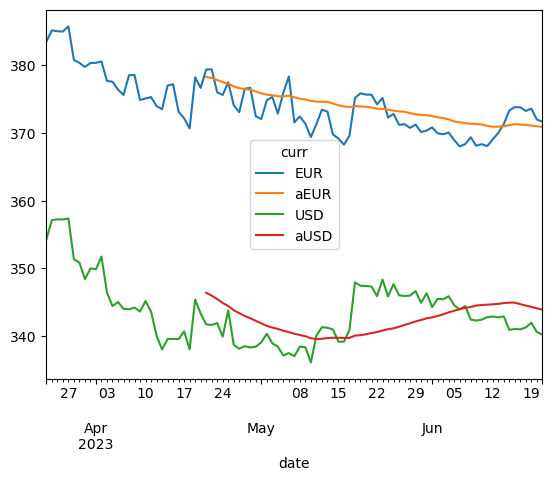

In [106]:
dfa.plot(kind="line", x="date", y=["EUR", "aEUR", "USD", "aUSD"])